In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import sympy
import networkx as nx
from IPython.display import clear_output

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
colors = plt.cm.magma(np.linspace(.3,1,8))

In [ ]:
def hard_sparsity(k):
    """
    Generate a k×k block sparsity pattern with k² chromatic number.
    
    This function creates a pathological sparsity pattern that demonstrates the worst-case
    behavior for graph coloring algorithms. Despite having sparsity s = 2k-1, the chromatic
    number is k², making coloring-based algorithms inefficient.
    
    Parameters
    ----------
    k : int
        Block size parameter. Output matrix will be k²×k²
    
    Returns
    -------
    S : ndarray of shape (k², k²)
        Binary sparsity pattern matrix
    
    Structure
    ---------
    The matrix is structured as k×k blocks of k×k submatrices:
    - For entry (p*k+i, q*k+j):
        S[p*k+i, q*k+j] = 1 if i==q or j==p
        S[p*k+i, q*k+j] = 0 otherwise
    
    This creates a pattern where:
    - Each row has exactly 2k-1 nonzeros (at most)
    - Each column conflicts with k² other columns
    - Chromatic number χ(G) = k²
    
    Example (k=2)
    -------------
    For k=2, output is 4×4 matrix:
    [1 1 1 0]
    [1 1 0 1]
    [1 0 1 1]
    [0 1 1 1]
    
    This has sparsity s=3 but chromatic number k²=4
    
    Notes
    -----
    - This is a "hard" example where coloring provides no advantage over sparse recovery
    - Row sparsity: s ≤ 2k-1
    - Chromatic number: χ = k²
    - Demonstrates that k can be Ω(s²) in worst case
    """

    # Initialize k²×k² zero matrix
    S = np.zeros((k**2, k**2))
    
    # Fill in sparsity pattern using block structure
    for p in range(k):          # Row block index
        for q in range(k):      # Column block index
            for i in range(k):  # Row within block
                for j in range(k):  # Column within block
                    # Entry is nonzero if i==q (vertical strip) or j==p (horizontal strip)
                    if i == q or j == p:
                        S[p*k + i, q*k + j] = 1
    
    return S

In [5]:
k = 6
S = hard_sparsity(k)


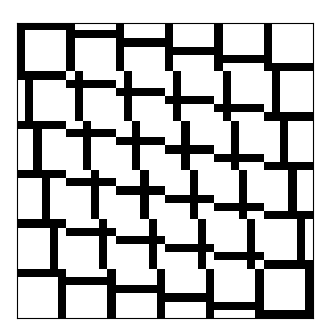

In [6]:
fig,axs = plt.subplots(2,1,figsize=(4,4),height_ratios=[1,36])
plt.subplots_adjust(hspace=.03)

c = np.zeros((1,k**2))
c[:,:k**2//2] = 1
axs[0].axis('off')

axs[1].imshow(S,cmap='binary')
axs[1].set_xticks([])
axs[1].set_yticks([])

plt.savefig('imgs/hard_coloring_sparsity.pdf')

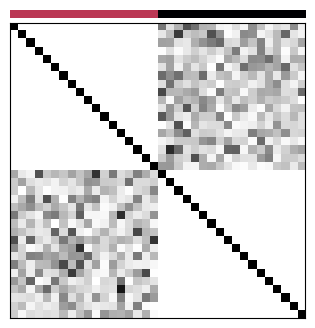

In [7]:
n = 36

S = np.zeros((n,n))

S += np.eye(n)

σ = .3
np.random.seed(0)
S[:n//2,n//2:] += σ*np.abs(np.random.randn(n//2,n//2))
S[n//2:,:n//2] += σ*np.abs(np.random.randn(n//2,n//2))

fig,axs = plt.subplots(2,1,figsize=(4,4),height_ratios=[1,n])
plt.subplots_adjust(hspace=.03)

c = np.zeros((1,n))
c[:,:n//2] = 1
axs[0].imshow(c,cmap='inferno',vmin=0,vmax=2)
axs[0].axis('off')

axs[1].imshow(S,cmap='binary')
axs[1].set_yticks([])
axs[1].set_xticks([])

plt.savefig('imgs/good_coloring_sparsity.pdf')

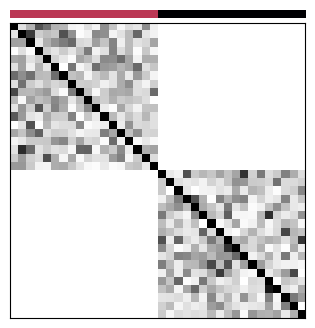

In [8]:
n = 36

S = np.zeros((n,n))

σ = .3
np.random.seed(0)

d = 2
for i in range(d):
    S[i*n//d:(i+1)*n//d,i*n//d:(i+1)*n//d] += σ*np.abs(np.random.randn(n//d,n//d))
# S = σ*np.abs(np.random.randn(n,n))

S -= np.diag(np.diag(S))
S += np.eye(n)


fig,axs = plt.subplots(2,1,figsize=(4,4),height_ratios=[1,n])
plt.subplots_adjust(hspace=.03)

c = np.zeros((1,n))
c[:,:n//2] = 1
axs[0].imshow(c,cmap='inferno',vmin=0,vmax=2)
axs[0].axis('off')

axs[1].imshow(S,cmap='binary')
axs[1].set_yticks([])
axs[1].set_xticks([])

plt.savefig('imgs/hard_coloring_sparsity1.pdf')